In [1]:
import os
import pandas as pd
import geopandas as gpd
import folium
import fiona
import matplotlib.pyplot as plt

In [2]:
trees_chc = gpd.read_file('output/chc_trees.gpkg')

<Axes: >

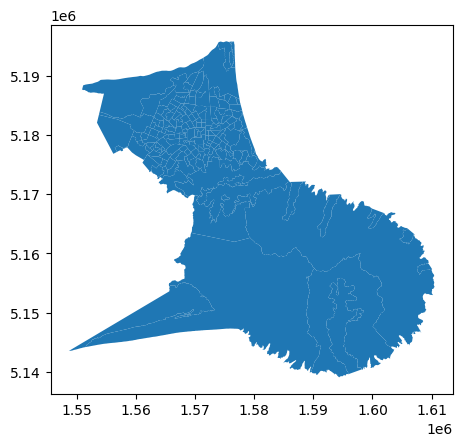

In [12]:
trees_chc.plot()

In [3]:
trees_chc.head()

SA22023_V1                                    SA22023__1  \
0     333000  Inland water Lake Ellesmere/Te Waihora South   
1     329001                                 Kennedys Bush   
2     328001                                Halswell South   
3     324502                           Halswell South West   
4     329002                           Halswell South East   

                                     SA22023__2  LAND_AREA_  AREA_SQ_KM  \
0  Inland water Lake Ellesmere/Te Waihora South    0.000000   63.307834   
1                                 Kennedys Bush    9.879958    9.879958   
2                                Halswell South    1.484849    1.484849   
3                           Halswell South West    2.769174    2.769174   
4                           Halswell South East    2.422008    2.422008   

     Shape_Leng   canopy_area      sa2_area   tree_pct  \
0  75227.813029  0.000000e+00  6.330803e+07   0.000000   
1  24883.084332  1.387753e+06  9.880177e+06  14.045832   
2   7770.313430  1.612629e+05  1.484697e+06  10.861672   
3   8065.210681  2.169748e+05  2.769084e+06   7.835617   
4   8876.742339  1.512842e+05  2.422235e+06   6.245645   

                                            geometry  
0  MULTIPOLYGON (((1568104.426 5155107.987, 15681...  
1  MULTIPOLYGON (((1567171.299 5174005.868, 15671...  
2  MULTIPOLYGON (((1565413.089 5173594.491, 15654...  
3  MULTIPOLYGON (((1564402.453 5174215.072, 15645...  
4  MULTIPOLYGON (((1567177.866 5174470.325, 15668...

In [ ]:
union_geom = trees_chc.union_all()
central_point = union_geom.centroid
central_point_wgs = gpd.GeoSeries([central_point], crs=2193).to_crs(4326).iloc[0]
lat, lon = central_point_wgs.y, central_point_wgs.x

m = folium.Map(
    location=[lat, lon],
    zoom_start=11,
    tiles='CartoDB Positron'
)

folium.Choropleth(
    geo_data=trees_chc,
    data=trees_chc,
    columns=['SA22023__2', 'tree_pct'],
    key_on='feature.properties.SA22023__2',
    fill_color='Greens',
    fill_opacity=0.75,
    line_opacity=0,
    legend_name='Tree Canopy Percentage (%)',
).add_to(m)

folium.GeoJson(
    trees_chc,
    name="sa2_borders",
    style_function=lambda x: {
        "color": "black",
        "weight": 0.3,
        "fillOpacity": 0
    }
).add_to(m)

folium.GeoJson(
    trees_chc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['SA22023__2', 'tree_pct'],
        aliases=['Suburb:', 'Canopy (%):'],
        localize=True
    ),
    style_function=lambda x: {"fillOpacity": 0, "color": "transparent"}
).add_to(m)

m

In [5]:
trees_chc['tree_pct'].describe()

count    179.000000
mean       9.672420
std        5.804047
min        0.000000
25%        6.205941
50%        9.520126
75%       12.834272
max       33.403795
Name: tree_pct, dtype: float64

In [11]:
trees_chc.sort_values('tree_pct', ascending=True).head(20)

SA22023_V1                                    SA22023__1  \
0       333000  Inland water Lake Ellesmere/Te Waihora South   
68      333400                          Inlet Akaroa Harbour   
78      333100                         Banks Peninsula South   
75      332501                                     Lyttelton   
73      332901                               Diamond Harbour   
72      332801                                    Teddington   
79      332200                                 Governors Bay   
70      333500                                        Akaroa   
69      333300                                Akaroa Harbour   
71      333201                  Banks Peninsula Eastern Bays   
74      332601                          Inlet Port Lyttelton   
99      332301                Inlets other Christchurch City   
14      324100                                   Wigram East   
16      322800                                   Wigram West   
13      323600                                  Wigram South   
19      322500                                  Wigram North   
120     326400                               Addington North   
111     328100                              Sydenham Central   
34      318200                                     Islington   
31      319101                   Islington-Hornby Industrial   

                                       SA22023__2  LAND_AREA_  AREA_SQ_KM  \
0    Inland water Lake Ellesmere/Te Waihora South        0.00       63.31   
68                           Inlet Akaroa Harbour        0.00       44.36   
78                          Banks Peninsula South      371.61      377.86   
75                                      Lyttelton        4.52        4.56   
73                                Diamond Harbour        3.02        3.02   
72                                     Teddington       47.42       47.42   
79                                  Governors Bay        3.24        3.24   
70                                         Akaroa        2.03        2.03   
69                                 Akaroa Harbour      162.14      162.14   
71                   Banks Peninsula Eastern Bays      368.03      368.03   
74                           Inlet Port Lyttelton        0.00       42.52   
99                 Inlets other Christchurch City        0.00       36.96   
14                                    Wigram East        0.31        0.31   
16                                    Wigram West        0.46        0.46   
13                                   Wigram South        0.40        0.40   
19                                   Wigram North        0.77        0.77   
120                               Addington North        0.43        0.43   
111                              Sydenham Central        1.21        1.21   
34                                      Islington        1.78        1.78   
31                    Islington-Hornby Industrial        7.27        7.27   

     Shape_Leng  canopy_area     sa2_area  tree_pct  \
0      75227.81         0.00  63308029.27      0.00   
68     65646.34         0.00  44362371.21      0.00   
78    181238.84         0.00 377861955.27      0.00   
75     22722.59         0.00   4564752.41      0.00   
73     17520.20         0.00   3017953.88      0.00   
72     61943.26         0.00  47416905.48      0.00   
79     14801.62         0.00   3237764.75      0.00   
70     11499.90         0.00   2029934.24      0.00   
69    150520.94         0.00 162140765.12      0.00   
71    213391.26         0.00 368030959.15      0.00   
74     79344.48         0.00  42520720.57      0.00   
99    109628.99      1042.51  36963991.66      0.00   
14      2524.30        74.83    311410.89      0.02   
16      3131.95      1311.89    458910.24      0.29   
13      2959.89      1970.10    399157.39      0.49   
19      4443.21      6991.27    767638.35      0.91   
120     4223.27      4879.89    434397.42      1.12   
111     4677.30     15106.01   1212760.60      1.25

In [7]:
trees_chc['canopy_area'].describe()

count    1.790000e+02
mean     2.813807e+05
std      1.037349e+06
min      0.000000e+00
25%      6.502159e+04
50%      1.076045e+05
75%      1.822599e+05
max      1.072048e+07
Name: canopy_area, dtype: float64

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
trees_chc['canopy_area'].skew()

np.float64(8.665743884778323)

In [10]:
trees_chc['canopy_area'].kurtosis()

np.float64(79.24783433572459)